In [1]:
import pandas as pd
import time
import tweepy
import numpy as np


In [4]:
def twitter_config():
    """
    Fungsi utilitas untuk mengkonfigurasi konsumsi file API Twitter dengan␣
    ,!kunci yang disediakan.
    """
    # Otentikasi dan akses menggunakan kunci:
    auth = tweepy.OAuthHandler("WuUsw1SXEQOJz2vpxhdxWfBMI",
    "8ByBgBWUqYtBZZLCRJSgjxFq5myQeUSz1G24QszwiPJ54kckVa")
    auth.set_access_token("1579422837755981824-vQ4c2D2hKqWbt6tLbwYfJr0gdUIpvy",
    "ajt7tW14WWuqhFJQOVg1m0zz4WYe8ayodpOuUUOlSXfwZ")
    # Kembalikan akses ke API:
    api = tweepy.API(auth)
    try:
        api.verify_credentials()
        print("Authentication OK")
    except:
        print("Error during authentication")
    return api
extractor = twitter_config()

Authentication OK


In [24]:
tweets = extractor.user_timeline(screen_name="detikcom", count=1000)
print("Tweets terambil: {}.\n".format(len(tweets)))


print("5 tweet teratas:\n")
for tweet in tweets[:1000]:
    print(tweet.text)
    print()

Tweets terambil: 200.

5 tweet teratas:

Bali meloloskan sembilan usulan Warisan Budaya Tak Benda (WBTB) Indonesia 2022. Dua di antaranya arak Bali dan jaja… https://t.co/CijsmiYuhu

Polisi akan memeriksa saksi terkait kasus dugaan KDRT Rizky Billar. Kali ini, polisi akan memeriksa penjaga rumah. https://t.co/EhfnTTn6QV

Tim Gabungan Independen Pencari Fakta (TGIPF) Tragedi Kanjuruhan memanggil PSSI. Pihak PSSI akan dimintai klarifika… https://t.co/H95cwjKYna

BPBD Kota Solo memetakan kawasan rawan bencana banjir dan tanah longsor. Sedikitnya ada 30 titik kawasan rawan banj… https://t.co/900PLAMRnK

Seorang turis India melapor kepada kepolisian Pattaya telah kehilangan lebih dari USD 6.000. Uang itu disimpan di b… https://t.co/6ODqKF4H9y

Prakiraan cuaca besok sudah diumumkan oleh BMKG. Sebelum bepergian esok hari, penting untuk memperhatikan prakiraan… https://t.co/MKSFdEhpgM

Dua orang pengedar narkoba jenis sabu di Desa Cimanggis, Tajur Halang, Bogor ditangkap. Pelaku mengedarkan na

In [25]:
# Kita dapat membuat kerangka data sebagai berikut:
dataset = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# Kami membuat tampilan kerangka data:
display(dataset.head(10))

,Tweets
0,Bali meloloskan sembilan usulan Warisan Budaya...
1,Polisi akan memeriksa saksi terkait kasus duga...
2,Tim Gabungan Independen Pencari Fakta (TGIPF) ...
3,BPBD Kota Solo memetakan kawasan rawan bencana...
4,Seorang turis India melapor kepada kepolisian ...
5,Prakiraan cuaca besok sudah diumumkan oleh BMK...
6,Dua orang pengedar narkoba jenis sabu di Desa ...
7,Video aksi mesum dilakukan dalam tenda di Curu...
8,Relawan Jokowi mengusulkan Jokowi untuk me-res...
9,Viral postingan di medsos soal pungutan biaya ...


In [26]:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [27]:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1579445412645470208
2022-10-10 12:15:05+00:00
Echobox
0
0
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/CijsmiYuhu', 'expanded_url': 'https://twitter.com/i/web/status/1579445412645470208', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}


In [28]:
dataset['len'] = np.array([len(tweet.text) for tweet in tweets])
dataset['ID']  = np.array([tweet.id for tweet in tweets])
dataset['Created'] = np.array([tweet.created_at for tweet in tweets])
dataset['Source'] = np.array([tweet.source for tweet in tweets])
dataset['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
dataset['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [29]:
dataset.head()

,Tweets,len,ID,Created,Source,Likes,RTs
0,Bali meloloskan sembilan usulan Warisan Budaya...,140,1579445412645470208,2022-10-10 12:15:05+00:00,Echobox,0,0
1,Polisi akan memeriksa saksi terkait kasus duga...,138,1579445385050800130,2022-10-10 12:14:59+00:00,Echobox,0,0
2,Tim Gabungan Independen Pencari Fakta (TGIPF) ...,140,1579445379938279424,2022-10-10 12:14:57+00:00,Echobox,0,0
3,BPBD Kota Solo memetakan kawasan rawan bencana...,140,1579444696388349952,2022-10-10 12:12:14+00:00,Echobox,3,0
4,Seorang turis India melapor kepada kepolisian ...,140,1579444480121655296,2022-10-10 12:11:23+00:00,Echobox,3,0


In [30]:
media = np.mean(dataset['len'])

print("Jumlah rata-rata karakter di tweet: {}".format(media))

Jumlah rata-rata karakter di tweet: 137.21


In [31]:
# Kami mengekstrak tweet dengan FAV paling banyak dan dengan RT terbanyak:

fav_max = np.max(dataset['Likes'])
rt_max  = np.max(dataset['RTs'])

fav = dataset[dataset.Likes == fav_max].index[0]
rt  = dataset[dataset.RTs == rt_max].index[0]

# Max FAVs:
print("Tweet yang paling banyak disukai adalah: \n{}".format(dataset['Tweets'][fav]))
print("Jumlah suka: {}".format(fav_max))
print("{} Characters.\n".format(dataset['len'][fav]))

Tweet yang paling banyak disukai adalah: 
Polisi di Malang melakukan sujud massal untuk meminta maaf kepada keluarga korban Tragedi Kanjuruhan. Tragedi itu m… https://t.co/4IDej7gE8w
Jumlah suka: 2377
140 Characters.



In [32]:
print("Tweet dengan retweet terbanyak adalah: \n{}".format(dataset['Tweets'][rt]))
print("Jumlah retweet: {}".format(rt_max))
print("{} Characters.\n".format(dataset['len'][rt]))

Tweet dengan retweet terbanyak adalah: 
Polisi di Malang melakukan sujud massal untuk meminta maaf kepada keluarga korban Tragedi Kanjuruhan. Tragedi itu m… https://t.co/4IDej7gE8w
Jumlah retweet: 435
140 Characters.



In [33]:
tlen = pd.Series(data=dataset['len'].values, index=dataset['Created'])
tfav = pd.Series(data=dataset['Likes'].values, index=dataset['Created'])
tret = pd.Series(data=dataset['RTs'].values, index=dataset['Created'])

C:\Users\lenov\anaconda3\lib\sre_parse.py:500: RuntimeWarning: coroutine 'Twint.main' was never awaited
  sourcematch = source.match


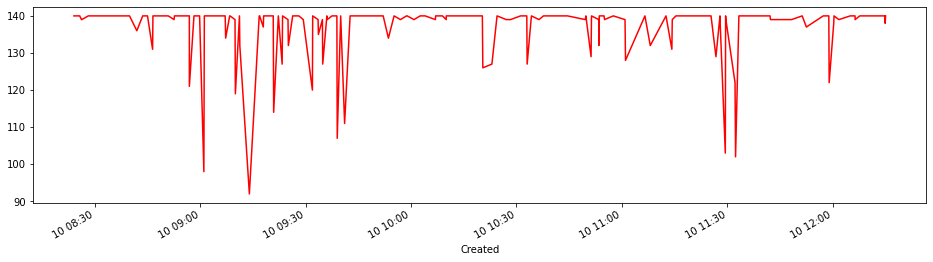

In [34]:
tlen.plot(figsize=(16,4), color='r');

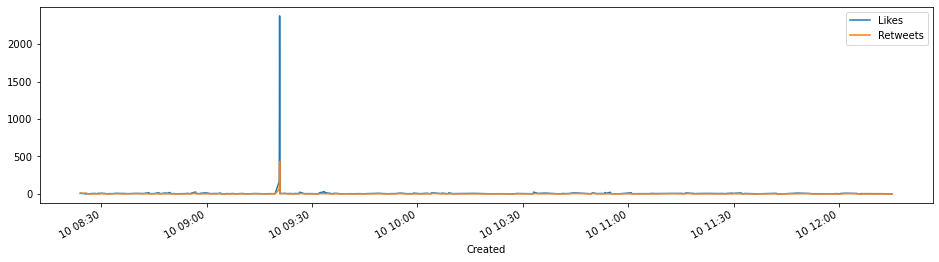

In [35]:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [36]:
sources = []
for source in dataset['Source']:
    if source not in sources:
        sources.append(source)

# pembuatan:
print("Sumber pembuatan konten:")
for source in sources:
    print("* {}".format(source))

Sumber pembuatan konten:
* Echobox
* Twitter Web App


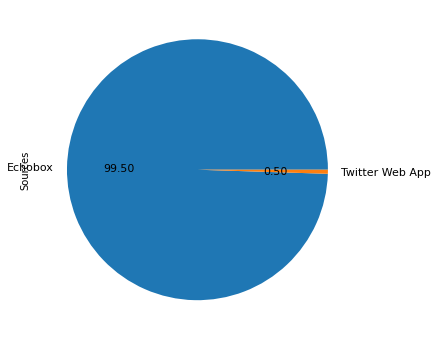

In [37]:
percent = np.zeros(len(sources))

for source in dataset['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [38]:
dataset.to_csv('projecttugas.csv',sep=';')

In [43]:
tweets = extractor.user_timeline(screen_name="detikcom", count=200)
print("Tweets terambil: {}.\n".format(len(tweets)))

Tweets terambil: 200.



In [46]:
import pandas as pd
dataset = pd.read_csv('projecttugas.csv', sep=';')
dataset.head()

,Unnamed: 0,Tweets,len,ID,Created,Source,Likes,RTs
0,0,Bali meloloskan sembilan usulan Warisan Budaya...,140,1579445412645470208,2022-10-10 12:15:05+00:00,Echobox,0,0
1,1,Polisi akan memeriksa saksi terkait kasus duga...,138,1579445385050800130,2022-10-10 12:14:59+00:00,Echobox,0,0
2,2,Tim Gabungan Independen Pencari Fakta (TGIPF) ...,140,1579445379938279424,2022-10-10 12:14:57+00:00,Echobox,0,0
3,3,BPBD Kota Solo memetakan kawasan rawan bencana...,140,1579444696388349952,2022-10-10 12:12:14+00:00,Echobox,3,0
4,4,Seorang turis India melapor kepada kepolisian ...,140,1579444480121655296,2022-10-10 12:11:23+00:00,Echobox,3,0


In [47]:
#hapus stop word
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
 
factory = StopWordRemoverFactory()

more_stopword = ['sih', 'nya','rt','loh','lah', 'dd', 'mah', 'nye', 'eh', 'ehh', 'ah', 'yang','yg']
 
# Tambahkan Stopword Baru
data = factory.get_stop_words()+more_stopword

stopwords_sastrawi = factory.create_stop_word_remover()

dictionary = ArrayDictionary(data)
str_stopwords = StopWordRemover(dictionary)

ModuleNotFoundError: No module named 'Sastrawi'

In [48]:
pip install sastrawi

In [49]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
 
factory = StopWordRemoverFactory()

more_stopword = ['sih', 'nya','rt','loh','lah', 'dd', 'mah', 'nye', 'eh', 'ehh', 'ah', 'yang','yg']
 
# Tambahkan Stopword Baru
data = factory.get_stop_words()+more_stopword

stopwords_sastrawi = factory.create_stop_word_remover()

dictionary = ArrayDictionary(data)
str_stopwords = StopWordRemover(dictionary)

In [ ]:
dataset['finalText_str'] = dataset['step02'].apply(str)

In [ ]:
dataset.loc[:, ('ProcessedText')] = final_string

In [52]:
dataset

,Unnamed: 0,Tweets,len,ID,Created,Source,Likes,RTs
0,0,Bali meloloskan sembilan usulan Warisan Budaya...,140,1579445412645470208,2022-10-10 12:15:05+00:00,Echobox,0,0
1,1,Polisi akan memeriksa saksi terkait kasus duga...,138,1579445385050800130,2022-10-10 12:14:59+00:00,Echobox,0,0
2,2,Tim Gabungan Independen Pencari Fakta (TGIPF) ...,140,1579445379938279424,2022-10-10 12:14:57+00:00,Echobox,0,0
3,3,BPBD Kota Solo memetakan kawasan rawan bencana...,140,1579444696388349952,2022-10-10 12:12:14+00:00,Echobox,3,0
4,4,Seorang turis India melapor kepada kepolisian ...,140,1579444480121655296,2022-10-10 12:11:23+00:00,Echobox,3,0
...,...,...,...,...,...,...,...,...
195,195,Seorang mahasiswa UGM loncat dari lantai 11. K...,140,1579388288481181696,2022-10-10 08:28:06+00:00,Echobox,7,2
196,196,Banyak yang mengatakan uang atau kekayaan tida...,139,1579387828014022661,2022-10-10 08:26:16+00:00,Echobox,2,1
197,197,"Belum banyak yang tahu, semua motor Honda yang...",139,1579387801853841408,2022-10-10 08:26:10+00:00,Echobox,4,1
198,198,RT @detikoto: Surat Izin Mengemudi (SIM) Indon...,140,1579387675219722241,2022-10-10 08:25:40+00:00,Twitter Web App,0,12


In [58]:
dataset.to_csv('clean_dataset_steam.csv',sep=';')

In [61]:
import re
import string
import pandas as pd
df = pd.read_csv('clean_dataset_steam.csv')
df.head()


ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2


In [63]:
import re
import string
import time
from copy import deepcopy

In [62]:
import pandas as pd

In [64]:
df = pd.read_csv('clean_dataset_steam.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2
